# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

Has life expectancy increased over time in the six nations?
Has GDP increased over time in the six nations?
Is there a correlation between GDP and life expectancy of a country?
What is the average life expectancy in these nations?
What is the distribution of that life expectancy?
Data sources

GDP Source: World Bank national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: World Health Organization

In [1]:
#import all important modules
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pandas as pd
%matplotlib inline

#examine the given dataframe
df = pd.read_csv("all_data.csv")
#rename Life expectancy 
df.rename(columns={'Life expectancy at birth (years)': 'Life_Exp'}, inplace=True)
df.head()
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

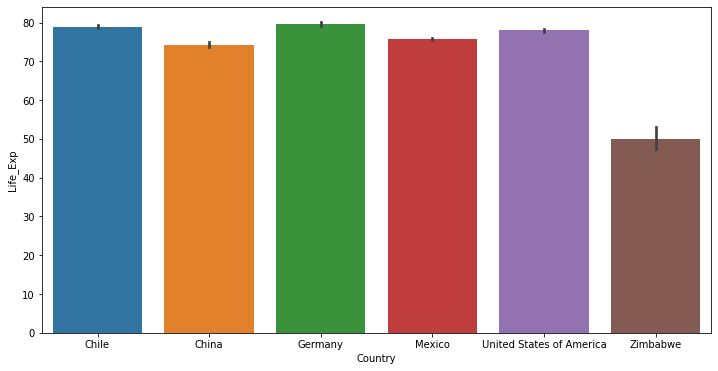

In [2]:

#create a boxplt to compare mean LifeExp between countries
plt.figure(figsize=(12,6))
sns.barplot(x='Country', y='Life_Exp', data=df)
plt.show()

<AxesSubplot:xlabel='GDP', ylabel='Country'>

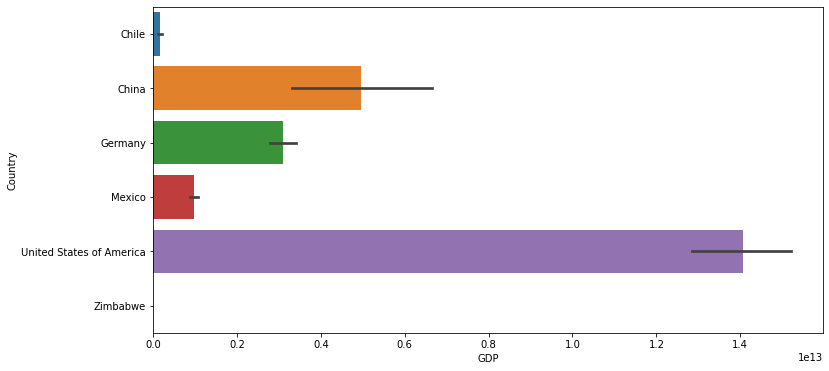

In [3]:
#create a boxplt to compare mean GDP between countries
plt.figure(figsize=(12,6))
sns.barplot(x='GDP', y='Country', data=df)

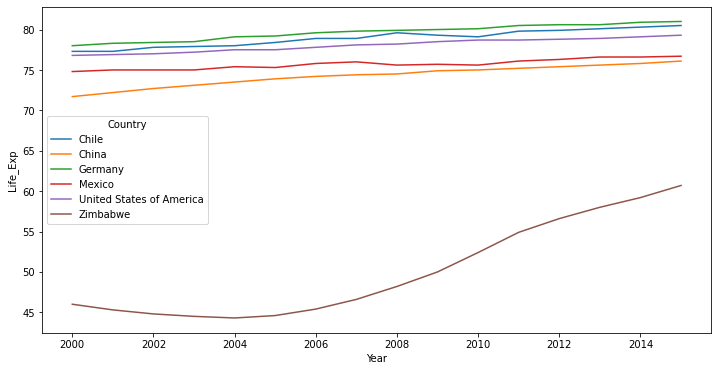

In [4]:
plt.figure(figsize=(12,6))
sns.lineplot(y='Life_Exp',x='Year', data=df, hue='Country')
plt.show()

Seems like Zimbabwe is rising in the last years, lets compare the gdp of the countries

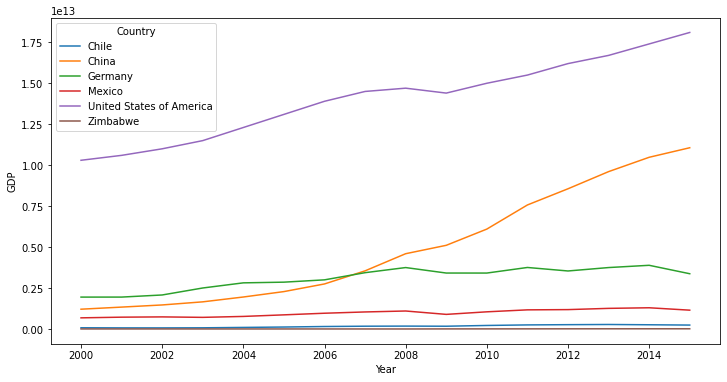

In [5]:
plt.figure(figsize=(12,6))
sns.lineplot(y='GDP', x='Year', data=df, hue='Country')
plt.show()

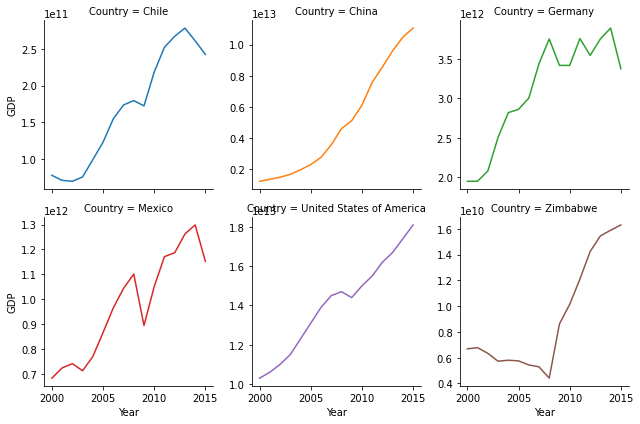

In [6]:
gdp_grid = sns.FacetGrid(df, col="Country", hue='Country', sharey=False, col_wrap=3)
gdp_grid.map_dataframe(sns.lineplot, x='Year', y='GDP')
plt.show()

Seems like gdp is rising similar in all countries, lets see if the growth of the gdp of Zimbabwe had influenced the life epeectency stronger percent wise.


In [34]:
#norm the gdp data and life expectancy from 0 to 1 for each year 
#plot normed data in one plot
countries = df.Country.unique()
print(countries)
#create new normed column
df['GDP_normed'] = 0
df['Life_Exp_normed'] = 0
#create min max normed columns in pd
df['GDP_normed_min_max'] = (df.GDP - df.GDP.min()) / (df.GDP.max() - df.GDP.min())
df['Life_Exp_normed_min_max'] = (df.Life_Exp - df.Life_Exp.min()) / (df.Life_Exp.max() - df.Life_Exp.min())
#min max will not be further explored, data basically the same as seen in the graphs above
#create normed columns in relation to a countire relative increase
for str in countries:
    df['GDP_normed' + str] = df.GDP[df.Country == str] / sum(df.GDP[df.Country == str])
    df['Life_Exp_normed' + str] = df.Life_Exp[df.Country == str] / sum(df.Life_Exp[df.Country == str])
    #drop empty values
    df['GDP_normed' + str] = df['GDP_normed' + str].replace(np.nan,0)
    df['Life_Exp_normed' + str] = df['Life_Exp_normed' + str].replace(np.nan,0)
    #join columns in GDP_normed
    df['GDP_normed'] = df['GDP_normed'] + df['GDP_normed' + str]
    df['Life_Exp_normed'] = df['Life_Exp_normed'] + df['Life_Exp_normed' + str]
    #all subcolumns can theoretically be deleted


        



['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [35]:
#test if worked fine
print(sum(df.GDP_normed))
print(sum(df.Life_Exp_normed))

6.0
6.000000000000002


lets create some subplots to see if the rise of GDP has had an abnormal effect on Zimbabwe

<AxesSubplot:xlabel='GDP_normed', ylabel='Life_Exp_normed'>

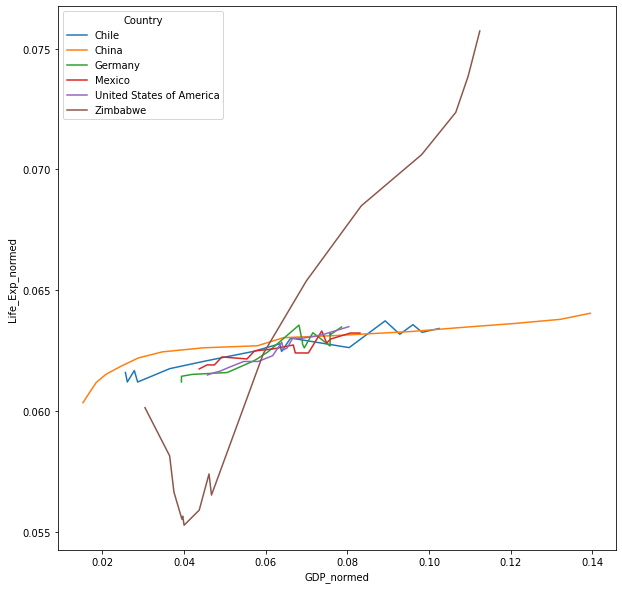

In [36]:
plt.figure(figsize=(10,10))
sns.lineplot(data= df, y='Life_Exp_normed', x='GDP_normed', hue='Country')

Seems like an increas in GDP has had a stronger effect on Zimbabwe thanon the other countries.
Further exlporation needed to see why the life expectancy is significantly lower at 0.04 than at 0.03.

<AxesSubplot:xlabel='Year', ylabel='GDP_normed'>

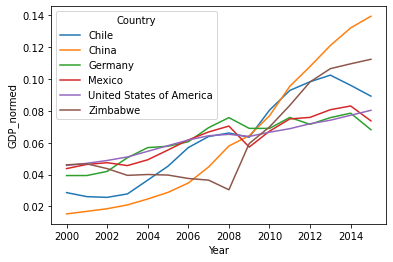

In [37]:
sns.lineplot(data=df, x='Year', y='GDP_normed', hue='Country')

<AxesSubplot:xlabel='Year', ylabel='Life_Exp_normed'>

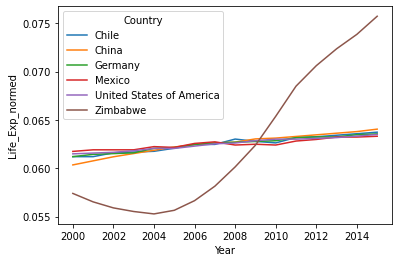

In [38]:
sns.lineplot(data=df, x='Year', y='Life_Exp_normed', hue='Country')